In [1]:
import sys
sys.path.insert(0,"../../python")

jarfile = "../../target/salsa3d-software-1.2022.5-jar-with-dependencies.jar"

from PyPCalc import PCalc

# Example to recreate travel time prediction for P wave to station SYNTH for AK135 relative to Lookup2d

In [2]:
# First, setup run for AK135 predictions to station1
config = PCalc.initialize_configuration(captureOutput=True, use_slbm=False, 
                                        returnObject='array',jarFile = jarfile)

props = PCalc.initialize_properties(
    application = 'predictions',
    workDir = '.',
    predictors = 'bender',
    benderModel = "../data/AK135.geotess",
    inputType = 'grid',
    phase = 'P',
    site = '37, 139, 0.6',
    sta = "SYNTH",
    jdate = '2011001',
    gridRangeLat = '-90 90 181',
    gridRangeLon = '-180 180 361',
    depthSpecificationMethod = 'depths',
    depths = '1',
    outputType = 'file',
    outputFile = "<property:workDir>/pcalc_predictions_grid_output_ak135.dat",
    logFile = "<property:workDir>/pcalc_log.txt",
    terminalOutput = True,
    outputHeader = True,
    separator = 'space',
    outputAttributes = 'travel_time')

# Creates the main pcalc object
calc = PCalc(config = config, properties = props)


In [3]:
recalculate = True
if recalculate:
    calc.writePropertiesFile()
    r, ak135_tt = calc.execute()
else:
    ak135_tt =  PCalc.getOutputGrid("pcalc_predictions_grid_output_ak135.dat",
                               separator = 'space', nattributes=1, returnObject='array', header=0)

In [4]:
# Now, repeat for AK135
config = PCalc.initialize_configuration(captureOutput=True, use_slbm=False, 
                                        returnObject='array', jarFile = jarfile)

props = PCalc.initialize_properties(
    application = 'predictions',
    workDir = '.',
    predictors = 'lookup2d',
    inputType = 'grid',
    phase = 'P',
    site = '37, 139, 0.6',
    sta = "SYNTH",
    jdate = '2011001',
    gridRangeLat = '-90 90 181',
    gridRangeLon = '-180 180 361',
    depthSpecificationMethod = 'depths',
    depths = '1',
    outputType = 'file',
    outputFile = "<property:workDir>/pcalc_predictions_grid_output_lookup.dat",
    logFile = "<property:workDir>/pcalc_log.txt",
    terminalOutput = True,
    outputHeader = True,
    separator = 'space',
    outputAttributes = 'travel_time')

# Creates the main pcalc object
calc = PCalc(config = config, properties = props)

In [5]:
calc.writePropertiesFile()
r, lookup_tt = calc.execute()

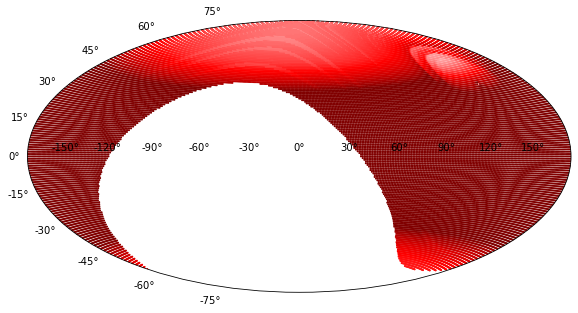

In [7]:
# Finds where the travel time is non-negative and then plots the difference, in seconds
# between the geotess model and ak135
import numpy as np
idx = np.where(ak135_tt[:,3] > 0)
ak135_tt_clean = ak135_tt[idx[0],:]
lookup_tt_clean = lookup_tt[idx[0],:]

ttdiff = ak135_tt_clean[:,3] - lookup_tt_clean[:,3]

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,5))
ax = plt.subplot(projection='hammer')
ax.scatter(ak135_tt_clean[:,0]*np.pi/180, ak135_tt_clean[:,1]*np.pi/180, s=1, c=ttdiff, vmin=-4, vmax=4, 
           cmap='seismic')
plt.show()

In [ ]:
# Note that the above map looks a bit funky because we can't adjust the geographic limits without using
# cartopy, but this works for a first pass sanity check.